# 第9章	统计分析

## 9.1	安装Pandas和SciPy


In [1]:
import math
import statistics
import numpy
import scipy.stats
import pandas

In [2]:
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0]

In [3]:
x

[8.0, 1, 2.5, 4, 28.0]

In [4]:
x_with_nan

[8.0, 1, 2.5, nan, 4, 28.0]

In [5]:
math.isnan(numpy.nan), numpy.isnan(math.nan),


(True, True)

In [6]:
math.isnan(x_with_nan[3]), numpy.isnan(x_with_nan[3])

(True, True)

In [7]:
y, y_with_nan = numpy.array(x), numpy.array(x_with_nan)
z, z_with_nan = pandas.Series(x), pandas.Series(x_with_nan)
y, y_with_nan,z,z_with_nan

(array([ 8. ,  1. ,  2.5,  4. , 28. ]),
 array([ 8. ,  1. ,  2.5,  nan,  4. , 28. ]),
 0     8.0
 1     1.0
 2     2.5
 3     4.0
 4    28.0
 dtype: float64,
 0     8.0
 1     1.0
 2     2.5
 3     NaN
 4     4.0
 5    28.0
 dtype: float64)

### 9.2.1	平均值

In [8]:
def Mean(s):
    """
    计算一组数据的平均值

    入参
    _____
    s: float
       一组数据

    返回值
    ______
    m: float
       平均值
    """
    m = float(sum(s)) / len(s)
    return m
Mean(x)

8.7

In [9]:
print("x的平均值是： %g" % (Mean(x)))

x的平均值是： 8.7


In [10]:
mean_ = statistics.mean(x)
mean_

8.7

In [11]:
mean_ = statistics.fmean(x)
mean_

8.7

In [12]:
mean_ = statistics.mean(x_with_nan)
mean_

nan

In [13]:
mean_ = statistics.fmean(x_with_nan)
mean_

nan

In [14]:
numpy.mean(y), y.mean()

(8.7, 8.7)

In [15]:
numpy.mean(y_with_nan), y_with_nan.mean()

(nan, nan)

通常我们并不需要获得nan值，此时可以使用numpy.nanmean()


In [16]:
numpy.nanmean(y_with_nan)

8.7

In [17]:
a = numpy.array([[8.0, 1, 2.5, 4, 28.0], [0.1, 0.2, 0.3, 0.25, 0.15]])

In [18]:
print('数组每行的均值:')
print(numpy.mean(a, axis = 1))

print('数组每列的均值:')
print((numpy.mean(a, axis = 0)))

数组每行的均值:
[8.7 0.2]
数组每列的均值:
[ 4.05   0.6    1.4    2.125 14.075]


In [19]:
z_with_nan.mean()

8.7

此行为是可选参数skipna的默认值造成的。可以通过更改此参数来修改行为。

### 9.2.2	加权平均值

In [20]:
0.2 * 2 + 0.5 * 4 + 0.3 * 8

4.8

In [21]:
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]

def WMean(s, w):
    """
    计算一组数据的加权平均值

    入参
    _____
    s: float
       一组数据
    w: float
       数据的权重

    返回值
    ______
    wm: float
       加权平均值
    """
    wm = sum(w[i] * s[i] for i in range(len(x))) / sum(w)
    return wm

WMean(x, w)

6.95

In [22]:
def WMean(s, w):
    """
    计算一组数据的加权平均值
    使用zip()的实现

    入参
    _____
    s: float
       一组数据
    w: float
       数据的权重

    返回值
    ______
    wm: float
       加权平均值
    """
    wm = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
    return wm

WMean(x, w)



6.95

In [23]:
y, z, w = numpy.array(x), pandas.Series(x), numpy.array(w)
wmean = numpy.average(y, weights=w)
wmean

6.95

In [24]:
wmean = numpy.average(z, weights=w)
wmean

6.95

In [25]:
w = numpy.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
(w * y_with_nan).sum() / w.sum()

nan

In [26]:
numpy.average(y_with_nan, weights=w), numpy.average(z_with_nan, weights=w)


(nan, nan)

In [27]:
a = numpy.arange(6).reshape(3,2) 
wts = numpy.array([3,5])
numpy.average(a, axis = 1, weights=wts)  # 每行加权平均

array([0.625, 2.625, 4.625])

### 9.2.3	调和平均值

In [28]:
def HMean(s):
    """
    计算一组数据的调和平均值

    入参
    _____
    s: float
       一组数据

    返回值
    ______
    hm: float
       调和平均值
    """
    hmean = len(x) / sum(1 / item for item in x)
    return hmean
HMean(x)

2.7613412228796843

In [29]:
hmean = statistics.harmonic_mean(x)
hmean

2.7613412228796843

In [30]:
statistics.harmonic_mean(x_with_nan)

nan

In [31]:
 statistics.harmonic_mean([1, 0, 2])

0

In [32]:
statistics.harmonic_mean([1, 2, -2]) 

StatisticsError: harmonic mean does not support negative values

In [33]:
y, scipy.stats.hmean(y)

(array([ 8. ,  1. ,  2.5,  4. , 28. ]), 2.7613412228796843)

In [34]:
z, scipy.stats.hmean(z)

(0     8.0
 1     1.0
 2     2.5
 3     4.0
 4    28.0
 dtype: float64,
 2.7613412228796843)

### 9.2.4	几何平均值

In [35]:
def GMean(s):
    """
    计算一组数据的几何平均值

    入参
    _____
    s: float
       一组数据

    返回值
    ______
    hm: float
       几何平均值
    """
    gmean = 1
    for item in x:
        gmean *= item

    gmean **= 1 / len(x)
    return gmean

GMean(x)

4.677885674856041

In [36]:
statistics.geometric_mean(x), statistics.geometric_mean(x_with_nan)

(4.67788567485604, nan)

In [37]:
scipy.stats.gmean(y)

4.67788567485604

In [38]:
scipy.stats.gmean(z)

4.67788567485604

In [39]:
print('x的算术平均值是：%0.3f' % (statistics.mean(x)))
print('x的几何平均值是：%0.3f' % (statistics.geometric_mean(x)))
print('x的调和平均值是：%0.3f' % (statistics.harmonic_mean(x)))


x的算术平均值是：8.700
x的几何平均值是：4.678
x的调和平均值是：2.761


### 9.2.5	中位值

In [40]:
def Median(s):
    """
    计算一组数据的中位值

    入参
    _____
    s: float
       一组数据

    返回值
    ______
    median: float
       中位值
    """
    n = len(s)
    s.sort()

    if n % 2 == 0:        # 偶数个数据
        m1 = n//2 - 1     # 整数除法
        m2 = m1 + 1
        median = (s[m1] + s[m2])/2
    else:                # 奇数个数据
        m = (n - 1)//2
        median = s[m]

    return median
Median(x)

4

In [41]:
statistics.median(x),statistics.median(x[:-1])

(4, 3.25)

In [42]:
statistics.median_low(x[:-1])

2.5

In [43]:
statistics.median_high(x[:-1])

4

In [44]:
statistics.median(x_with_nan)

6.0

In [45]:
statistics.median_low(x_with_nan)

4

In [46]:
statistics.median_high(x_with_nan)

8.0

In [47]:
numpy.median(y), numpy.median(y[:-1])

(4.0, 3.25)

In [48]:
numpy.nanmedian(y_with_nan)

4.0

In [49]:
numpy.nanmedian(y_with_nan[:-1])

3.25

In [50]:
# 数组每行的中位值
numpy.median(a, axis = 1)


array([0.5, 2.5, 4.5])

In [51]:
#数组每列的中位值
numpy.median(a, axis = 0)

array([2., 3.])

In [52]:
z.median()

4.0

In [53]:
z_with_nan.median()

4.0

In [54]:
z_with_nan.median(skipna=False)

nan

### 9.2.6	众数

In [55]:
u = [2, 3, 2, 8, 12]
def Mode(s):
  
    """
    求一组数据的众数

    入参
    _____
    s: float
       一组数据

    返回值
    ______
    mode: float
       第一个出现的众数
    """
    hist = {}
    for x in s:
        hist[x] = hist.get(x, 0) + 1

    # 将字典按value排序
    h = sorted(hist.items(), key = lambda items:items[1], reverse=True)
    max = h[0][0]
    mode = []
    for n in h:
        if max > n[1]:
            break
        mode.append(n[0])

    return mode

Mode(u)

[2]

In [56]:
import collections

def Mode2(s):

    """
    求一组数据的众数 

    入参
    _____
    s: float
       一组数

    返回值
    ______
    mode: float
       众数数列
    """
    h = collections.Counter(s).most_common()
    max = h[0][1]
    mode = []
    for n in h:
        if max > n[1]:
            break
        mode.append(n[0])

    return mode

Mode2(u)

[2]

In [57]:
mode_ = statistics.mode(u)
mode_

2

In [58]:
mode_ = statistics.multimode(u)
mode_

[2]

In [59]:
v = [12, 15, 12, 15, 21, 15, 12]
statistics.mode(v) 

12

In [60]:
statistics.multimode(v)

[12, 15]

In [61]:
statistics.mode([2, math.nan, 2])

2

In [62]:
statistics.mode([2, math.nan, 0, math.nan, 5])

nan

In [63]:
u, v = numpy.array(u), numpy.array(v)
mode_ = scipy.stats.mode(u)
mode_

ModeResult(mode=array([2]), count=array([2]))

In [64]:
mode_ = scipy.stats.mode(v)
mode_

ModeResult(mode=array([12]), count=array([3]))

In [65]:
mode_.mode

array([12])

In [66]:
mode_.count

array([3])

In [67]:
u, v, w = pandas.Series(u), pandas.Series(v), pandas.Series([2, 2, math.nan])
u.mode()

0    2
dtype: int32

In [68]:
v.mode()

0    12
1    15
dtype: int32

In [69]:
w.mode()

0    2.0
dtype: float64

如上所见，.mode()返回一个包含所有众数的新的pd.Series。 如果希望.mode()将nan值考虑在内，则只需传递可选参数dropna = False。

### 9.2.7	方差

In [70]:
def Var(s, m=None):
    """
    求一组数据的方差

    入参
    _____
    s: float list
       一组数据
    m: flost，默认None
        数据的均值

    返回值
    ______
    v: float
        方差
    """
    if m is None:
        m = Mean(s)   # 求平均值

    # 计算每一个数据与平均值的差的平方
    v = sum((item - m)**2 for item in x) / (len(x) - 1)    
    return v

Var(x)


123.19999999999999

In [71]:
var_ = statistics.variance(x)
var_

123.2

In [72]:
statistics.variance(x, mean_)

nan

In [73]:
statistics.variance(x_with_nan)

nan

In [74]:
var_ = numpy.var(y, ddof=1)
var_

123.19999999999999

In [75]:
var_ = y.var(ddof=1)
var_

123.19999999999999

In [76]:
numpy.var(y_with_nan, ddof=1), y_with_nan.var(ddof=1)

(nan, nan)

In [77]:
numpy.nanvar(y_with_nan, ddof=1)

123.19999999999999

In [78]:
z.var(ddof=1), z_with_nan.var(ddof=1)

(123.19999999999999, 123.19999999999999)

pd.Series对象的var()方法也有参数ddof，但是它的默认值是1，所以可以忽略它。如果需要与nan值相关的不同行为，那么可以使用可选参数skipna。

### 9.2.8	标准差

In [79]:
std_ = var_ ** 0.5
std_

11.099549540409285

In [80]:
def Deviation(s, v=None):
    """
    求一组数据的标准差

    入参
    _____
    s: float list
    一组数据 
    v: flost，默认None
    数据的方差

    返回值
    ______
    d: float
    标准差
    """
    if v is None:
        v = Var(s) # 求方差

    import math
    d = math.sqrt(v)
    return d
    
print("x的标准差是：%f"%(Deviation(x)))


x的标准差是：11.099550


In [81]:
std_ = statistics.stdev(x)
std_

11.099549540409287

In [82]:
numpy.std(y, ddof=1), y.std(ddof=1)

(11.099549540409285, 11.099549540409285)

In [83]:
numpy.std(y_with_nan, ddof=1), y_with_nan.std(ddof=1)

(nan, nan)

In [84]:
numpy.nanstd(y_with_nan, ddof=1)


11.099549540409285

In [85]:
a = numpy.arange(100).reshape(5, 20) 
print("数组的方差是：%3f"%(numpy.var(a)))
print("数组的标准差是：%3f"%(numpy.std(a)))
print("数组每行的方差是：")
print(numpy.var(a, axis = 1))
print("数组每行的标准差是：")
print(numpy.std(a, axis = 1))

数组的方差是：833.250000
数组的标准差是：28.866070
数组每行的方差是：
[33.25 33.25 33.25 33.25 33.25]
数组每行的标准差是：
[5.7662813 5.7662813 5.7662813 5.7662813 5.7662813]


In [86]:
z.std(ddof=1), z_with_nan.std(ddof=1)

(11.099549540409285, 11.099549540409285)


### 9.2.9	偏度

In [87]:
def Skew(s, mean=None, std=None):
    """
    计算一组数据的偏度

    入参
    _____
    s: float
       一组数据
    mean: float
       数据的均值
    std: float
        数据的标准差

    返回值
    ______
    skew: float
       数据的偏度
    """
    if (mean == None):
        m = Mean(s)
    else:
        m = mean
    n = len(s)
    if (std == None):
        s = (sum((item - m)**2 for item in s) / (n - 1))**0.5
    else:
        s = std

    skew = (sum((item - m)**3 for item in x)
         * n / ((n - 1) * (n - 2) * s**3))
    return skew

x = [8.0, 1, 2.5, 4, 28.0]
Skew(x)

1.9470432273905929

In [88]:
y, y_with_nan = numpy.array(x), numpy.array(x_with_nan)
scipy.stats.skew(y, bias=False), scipy.stats.skew(y_with_nan, bias=False)

(1.9470432273905927, nan)

In [89]:
z, z_with_nan = pandas.Series(x), pandas.Series(x_with_nan)
z.skew(), z_with_nan.skew()

(1.9470432273905924, 1.9470432273905924)


### 9.2.10	百分位数

In [90]:
import math

def Percentile(s, percent):
    """
    求数据集中的百分位数
    
    入参
    _____
    s: float
       一组数据
    percent: float
       百分位，0.0～1.0之间的数值
    key: float
        数据的标准差

    返回值
    ______
    p: float
       百分位数
    """
    if not s:
        return None
    k = (len(s)-1) * percent
    f = math.floor(k)
    c = math.ceil(k)
    
    # 整数索引，直接返回数据集中的值
    if f == c:
        return key(s[int(k)])
    
    # 非整数索引，将相邻两个数加权平均
    d0 = s[int(f)] * (c-k)
    d1 = s[int(c)] * (k-f)
    return d0+d1

x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
Percentile(x, 0.05)

-3.44

In [91]:
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2)

[8.0]

In [92]:
statistics.quantiles(x, n=4, method='inclusive')

[0.1, 8.0, 21.0]

In [93]:
y = numpy.array(x)
numpy.percentile(y, 5), numpy.percentile(y, 95)

(-3.44, 34.919999999999995)

In [94]:
numpy.percentile(y, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [95]:
y_with_nan = numpy.insert(y, 2, numpy.nan)
y_with_nan

array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ])

In [96]:
numpy.nanpercentile(y_with_nan, [25, 50, 75])

array([ 0.1,  8. , 21. ])

In [97]:
numpy.quantile(y, 0.05), numpy.quantile(y, 0.95)

(-3.44, 34.919999999999995)

In [98]:
numpy.quantile(y, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [99]:
numpy.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

array([ 0.1,  8. , 21. ])

In [100]:
a = numpy.array([[30,40,70],[80,20,10],[50,90,60]]) 

print('数组是:' )
print(a)  

print('数组第50个百分数:')
print(numpy.percentile(a,50))

print('数组每行第50个百分数:')
print(numpy.percentile(a,50, axis = 1))

print('数组每列第50个百分数:')
print(numpy.percentile(a,50, axis = 0))


数组是:
[[30 40 70]
 [80 20 10]
 [50 90 60]]
数组第50个百分数:
50.0
数组每行第50个百分数:
[40. 20. 60.]
数组每列第50个百分数:
[50. 40. 60.]


In [101]:
z, z_with_nan = pandas.Series(y), pandas.Series(y_with_nan)
z.quantile(0.05), z.quantile(0.95)

(-3.44, 34.919999999999995)

In [102]:
z.quantile([0.25, 0.5, 0.75]), z_with_nan.quantile([0.25, 0.5, 0.75])

(0.25     0.1
 0.50     8.0
 0.75    21.0
 dtype: float64,
 0.25     0.1
 0.50     8.0
 0.75    21.0
 dtype: float64)


### 9.2.11	范围

In [103]:
def Range(s):
    """
    计算一组数据的范围

    入参
    _____
    s: float
       一组数据

    返回值
    ______
    range: float
       数据的范围
    """
    return max(s) - min(s)
x, Range(x)

([-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0], 46.0)

In [104]:
numpy.ptp(y), numpy.ptp(z)

(46.0, 46.0)

In [105]:
numpy.ptp(y_with_nan), numpy.ptp(z_with_nan)

(nan, nan)

In [106]:
quartiles = numpy.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [107]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

In [108]:
print('数组的数值范围:') 
print(numpy.ptp(a))

print('数组每一行的数值范围:')
print(numpy.ptp(a, axis = 1))

print('数组每一列的数值范围i:')
print(numpy.ptp(a, axis = 0))


数组的数值范围:
80
数组每一行的数值范围:
[40 70 40]
数组每一列的数值范围i:
[50 70 60]


## 9.3	描述性统计

In [109]:
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [110]:
result.nobs

9

In [111]:
result.minmax[0], result.minmax[1] 

(-5.0, 41.0)

In [112]:
result.mean, result.variance

(11.622222222222222, 228.75194444444446)

In [113]:
result.skewness, result.kurtosis

(0.9249043136685094, 0.14770623629658886)

In [114]:
result = z.describe()   # pandas
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [115]:
result['mean'], result['std']


(11.622222222222222, 15.12454774346805)

In [116]:
result['min'], result['max']

(-5.0, 41.0)

In [117]:
result['25%'], result['50%'], result['75%']

(0.1, 8.0, 21.0)


##  9.4	数据相关性

In [118]:
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = numpy.array(x), numpy.array(y)
x__, y__ = pandas.Series(x_), pandas.Series(y_)

### 9.4.1	协方差

In [119]:
def Cov(x, y):
    """
    计算两组数据的协方差

    入参
    _____
    x: 可迭代对象
       第一组数据
    y: 可迭代对象
       第二组数据

    返回值
    ______
    cov_xy: float
       两组数据的协方差
    """

    n = len(x)
    mean_x, mean_y = sum(x) / n, sum(y) / n
    cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))  / (n - 1))
    return cov_xy
Cov(x, y)

19.95

In [120]:
cov_matrix = numpy.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [121]:
x_.var(ddof=1), y_.var(ddof=1)

(38.5, 13.914285714285711)

In [122]:
x__.cov(y__), y__.cov(x__)

(19.95, 19.95)

### 9.4.2	相关系数

In [123]:
def Corrcoef(x, y):
    """
    计算两组数据的相关系数

    入参
    _____
    x: 可迭代对象
       第一组数据
    y: 可迭代对象
       第二组数据

    返回值
    ______
    r: float
       两组数据的相关系数
    """

    n = len(x)
    mean_x, mean_y = sum(x) / n, sum(y) / n

    var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
    var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
    std_x, std_y = var_x ** 0.5, var_y ** 0.5    
    cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n))  / (n - 1))
    r = cov_xy / (std_x * std_y)
    return r
Corrcoef(x, y)

0.861950005631606

In [124]:
r, p = scipy.stats.pearsonr(x_, y_)
r, p


(0.8619500056316061, 5.122760847201135e-07)

In [125]:
corr_matrix = numpy.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [126]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.8619500056316057, pvalue=5.122760847201238e-07, stderr=0.06992387660074986)

In [127]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.8619500056316057

In [128]:
x__.corr(y__), y__.corr(x__)

(0.861950005631606, 0.861950005631606)

## 9.5	从文件读取数据
### 9.5.1	处理CSV文件

In [129]:
import csv

with open('population.csv','r') as myFile:
    for line in myFile.readlines():
        print(line)

数据库：年度数据

时间：最近10年

指标,2019年,2018年,2017年,2016年,2015年,2014年,2013年,2012年,2011年,2010年

年底总人口(万人),140005.00,139538.00,139008.00,138271.00,137462.00,136782.00,136072.00,135404.00,134735.00,134091.00

男性人口(万人),71527.00,71351.00,71137.00,70815.00,70414.00,70079.00,69728.00,69395.00,69068.00,68748.46

女性人口(万人),68478.00,68187.00,67871.00,67456.00,67048.00,66703.00,66344.00,66009.00,65667.00,65342.54

城镇人口(万人),84843.00,83136.74,81347.48,79298.42,77116.18,74915.50,73111.49,71181.88,69078.63,66978.45

乡村人口(万人),55162.00,56401.26,57660.52,58972.58,60345.82,61866.50,62960.51,64222.12,65656.37,67112.55

数据来源：国家统计局



In [130]:
def load_data(file_name):
    """
    load_data(file_name)
    打开数据文件，将其中数据提取出来。

    入参
    _____
    file_name: string
       数据文件名

    返回值
    ______
    raw_data: string list
        文本形式的原始数据
        
    stats：float array
        统计数据
        
    x: int list
        年份列表
    """
    raw_data = []
    with open(file_name, 'r') as csv_file:
        lines = csv.reader(csv_file)
        for line in lines:
            raw_data.append(line)
    
    # 将年份提取出来
    import re
    dat_re = re.compile(r'\d+\.?\d*')
    x = [int(dat_re.search(i).group()) 
         for i in raw_data[2] if dat_re.search(i)]
    #print(x)

    # 由于数据按年份倒序存放，因此需要颠倒顺序
    stats = numpy.genfromtxt(file_name, delimiter=',',
                             skip_header=3, skip_footer=1)[..., -1:0:-1]
    return (raw_data, stats, x[-1::-1])

In [131]:
def print_data(raw_data):
    """
    print_data(raw_data)
    格式化输出统计数据。

    入参
    _____
    raw_data: string list
       原始数据

    返回值
    ______
        无
    """
    import prettytable as pt

    f_name = True
    tb = pt.PrettyTable()
    for line in raw_data:
        if (len(line) > 1):
            if (f_name == True):
                tb.field_names = line   # 第一行是栏位名称
                f_name = False
            else:
                tb.add_row(line)        # 统计数据
        else:
            print(line[0])              # 非统计数据
    print(tb)

In [132]:
import matplotlib.pyplot as plt

field_names = [u'年底总人口', u'男性人口', u'女性人口', u'城镇人口', u'乡村人口']
def plot_date(stats, x):
    """
    plot_date(stats, x)
    根据统计数据绘制折线图。

    入参
    _____
    stats: array
       统计数据
       
    x: int list
        年份列表

    返回值
    ______
        无
    """
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.xlabel("年份")
    plt.ylabel("人口(万人)")
    
    x_major_locator=plt.MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)

    for i in range(numpy.shape(stats)[0]):
        plt.plot(x, stats[i], marker='.', label=field_names[i])
    plt.legend(loc='upper left')
    plt.show()

数据库：年度数据
时间：最近10年
数据来源：国家统计局
+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|       指标       |   2019年  |   2018年  |   2017年  |   2016年  |   2015年  |   2014年  |   2013年  |   2012年  |   2011年  |   2010年  |
+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| 年底总人口(万人) | 140005.00 | 139538.00 | 139008.00 | 138271.00 | 137462.00 | 136782.00 | 136072.00 | 135404.00 | 134735.00 | 134091.00 |
|  男性人口(万人)  |  71527.00 |  71351.00 |  71137.00 |  70815.00 |  70414.00 |  70079.00 |  69728.00 |  69395.00 |  69068.00 |  68748.46 |
|  女性人口(万人)  |  68478.00 |  68187.00 |  67871.00 |  67456.00 |  67048.00 |  66703.00 |  66344.00 |  66009.00 |  65667.00 |  65342.54 |
|  城镇人口(万人)  |  84843.00 |  83136.74 |  81347.48 |  79298.42 |  77116.18 |  74915.50 |  73111.49 |  71181.88 |  69078.63 |  66978.45 |
|  乡村人口(万人)  |  55162

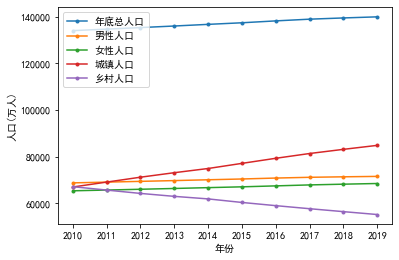

In [133]:
qd, q, X = load_data('population.csv')
print_data(qd)
plot_date(q, X)

### 9.5.2	对象化处理数据

In [134]:
import numpy
import csv
import prettytable as pt
import matplotlib.pyplot as plt
import re

class MyStats():
    """
    用来处理来自国家统计局（https://data.stats.gov.cn/）的统计数据的基类。
    国家统计局的数据格式通常如下：
        
        第1行：  数据库：年度数据
        第2行：  时间：最近xx年
        第3行：  指标，年份1，年份2，……，年份n
        第4行：  指标1
        ……
        第n行：  指标n
        第n+1行：数据来源：国家统计局

    本基类提取不同数据文件对象的公共部分。

    属性
    ----
    file_name: string
        数据文件的文件名。

    raw_data : string list
        以文本形式保存的原始数据。
    
    stats： float list
        统计数据组成的数组。
        
    x： int list
        绘图时，X坐标刻度。

    方法
    ----
    print_data()
        以格式化的方式输出统计数据
    plot_date()
        绘制统计曲线.

    """
    def __init__(self, file_name):
        """
        MyStats类构造函数
        打开数据文件，将其中数据提取出来。

        入参
        _____
        file_name: string
           数据文件名

        返回值
        ______
            无
        """
        self.__file_name = file_name
        raw_data = []
        with open(file_name, 'r') as csv_file:
            lines = csv.reader(csv_file)
            for line in lines:
                raw_data.append(line)

        # 将年份提取出来
        dat_re = re.compile(r'\d+\.?\d*')
        x = [int(dat_re.search(i).group()) for i in raw_data[2] if dat_re.search(i)]

        # 提取统计数据。由于统计是依时间逆序排列，因此需要反转排列顺序。
        self.__stats = numpy.genfromtxt(file_name, delimiter=',',
                                 skip_header=3, skip_footer=1)[..., -1:0:-1]
        self.__raw_data = raw_data
        self.__x = x[-1::-1]

    def __del__(self):
        """
        MyStats类析构函数。
        """
        del self.__raw_data
        del self.__x

    def print_data(self):
        """
        将统计数据格式化输出。
        """
        f_name = True
        tb = pt.PrettyTable()
        for line in self.__raw_data:
            if (len(line) > 1):
                if (f_name == True):
                    tb.field_names = line
                    f_name = False
                else:
                    tb.add_row(line)
            else:
                print(line[0])
        print(tb)

    def plot_date(self, field_names):
        """
        绘制统计图表。
        """
        plt.rcParams['font.sans-serif'] = ['SimHei']

        x_major_locator=plt.MultipleLocator(1)
        ax=plt.gca()
        ax.xaxis.set_major_locator(x_major_locator)

        for i in range(numpy.shape(self.__stats)[0]):
            plt.plot(self.__x, self.__stats[i], marker='.', label=field_names[i])
        plt.legend(loc='upper left')
        plt.show()            


In [135]:
class Population(MyStats):
    field_names = [u'年底总人口', u'男性人口', u'女性人口', u'城镇人口', u'乡村人口']
    
    def __init__(self, file_name):
        super(Population, self).__init__(file_name)
    
    def plot_date(self):        
        plt.xlabel("年份")
        plt.ylabel("人口(万人)")
        super(Population, self).plot_date(self.field_names)

数据库：年度数据
时间：最近10年
数据来源：国家统计局
+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
|       指标       |   2019年  |   2018年  |   2017年  |   2016年  |   2015年  |   2014年  |   2013年  |   2012年  |   2011年  |   2010年  |
+------------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+
| 年底总人口(万人) | 140005.00 | 139538.00 | 139008.00 | 138271.00 | 137462.00 | 136782.00 | 136072.00 | 135404.00 | 134735.00 | 134091.00 |
|  男性人口(万人)  |  71527.00 |  71351.00 |  71137.00 |  70815.00 |  70414.00 |  70079.00 |  69728.00 |  69395.00 |  69068.00 |  68748.46 |
|  女性人口(万人)  |  68478.00 |  68187.00 |  67871.00 |  67456.00 |  67048.00 |  66703.00 |  66344.00 |  66009.00 |  65667.00 |  65342.54 |
|  城镇人口(万人)  |  84843.00 |  83136.74 |  81347.48 |  79298.42 |  77116.18 |  74915.50 |  73111.49 |  71181.88 |  69078.63 |  66978.45 |
|  乡村人口(万人)  |  55162

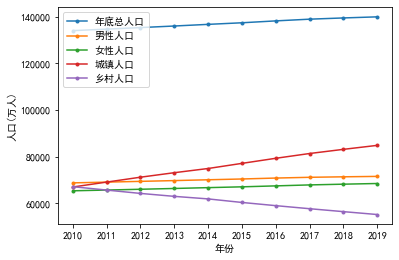

In [136]:
if __name__ == '__main__':   
    p = Population('population.csv')
    p.print_data()
    p.plot_date()
    del p

## 9.6	绘制统计图
### 9.6.1	上海车牌竞拍

In [137]:
license_data = numpy.genfromtxt('Shanghai_license_plate_price.csv',
                                delimiter=',', names=True)
numpy.shape(license_data)


(204,)

In [138]:
license_data.dtype

dtype([('Date', '<f8'), ('Total_number_of_license_issued', '<f8'), ('lowest_price', '<f8'), ('avg_price', '<f8'), ('Total_number_of_applicants', '<f8')])

In [139]:
license_data[1]

(nan, 1800., 13100., 14057., 4590.)

In [140]:
type(license_data[1])

numpy.void

In [141]:
license_data['Date']

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [142]:
license_data['Total_number_of_license_issued']

array([ 1400.,  1800.,  2000.,  2300.,  2350.,  2800.,  3000.,  3000.,
        3200.,  3200.,  3200.,  3600.,  3000.,  3000.,  3000.,  3300.,
        3800.,  5500.,  6000.,  4500.,  6650.,  4500.,  5042.,  4776.,
        5000.,  4800.,  4800.,  5500.,  6527.,  6233.,  6600.,  6800.,
        6640.,  6600.,  6600.,  5500.,  5500.,  3800.,  4000.,  5000.,
        5833.,  5690.,  6326.,  6829.,  6700.,  6000.,  5700.,  5700.,
        5000.,  3800.,  4500.,  5000.,  4500.,  4500.,  5500.,  6200.,
        6500.,  6500.,  6000.,  6500.,  6000.,  3500.,  4000.,  5500.,
        6000.,  6000.,  5500.,  8000.,  8500.,  7500.,  7500.,  7500.,
       16000.,  9300.,  9000.,  8200.,  7700.,  6800.,  6000.,  6500.,
        5000.,  5500.,  4500.,  5200.,  5200.,  6000.,  6500.,  7200.,
        8000.,  8000.,  8000.,  8500.,  8000.,  8000.,  8000.,  8000.,
        7500.,  8000.,  8500.,  8500.,  9200.,  9000.,  9000.,  9000.,
        9000.,  8500.,  9000.,  8000.,  7500.,  8000.,  8000.,  9000.,
      

In [143]:
# 读取CSV文件中第一列的内容
with open('Shanghai_license_plate_price.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    column0 = [row[0] for row in reader]


In [144]:
import time
import matplotlib as mpl
import datetime

# 将第一列数据转换成x轴日期刻度
x= []
for t in column0:
    d = time.strptime(t, "%b-%y") # 将日期字符串转换为时间元组
    # 将日期时间对象转换为Matplotlib日期后，添加到列表x
    x.append(mpl.dates.date2num(datetime.datetime(d.tm_year, d.tm_mon, 1)))

In [145]:
# 获取数据最大值
y_max = 0
y_min = numpy.Inf

# 数据文件中包含的不同数据项
field = ['Total number of license issued', 
         'lowest price', 'avg price', 'Total number of applicants']

for column in field:
    if column == 'Date':
        continue
    column_rec_name = column.replace('\n', '_').replace(' ', '_')
    ymax = numpy.amax(license_data[column_rec_name])
    ymin = numpy.amin(license_data[column_rec_name])
    if (y_max < ymax):
        y_max = ymax
    if (y_min > ymin):
        y_min = ymin

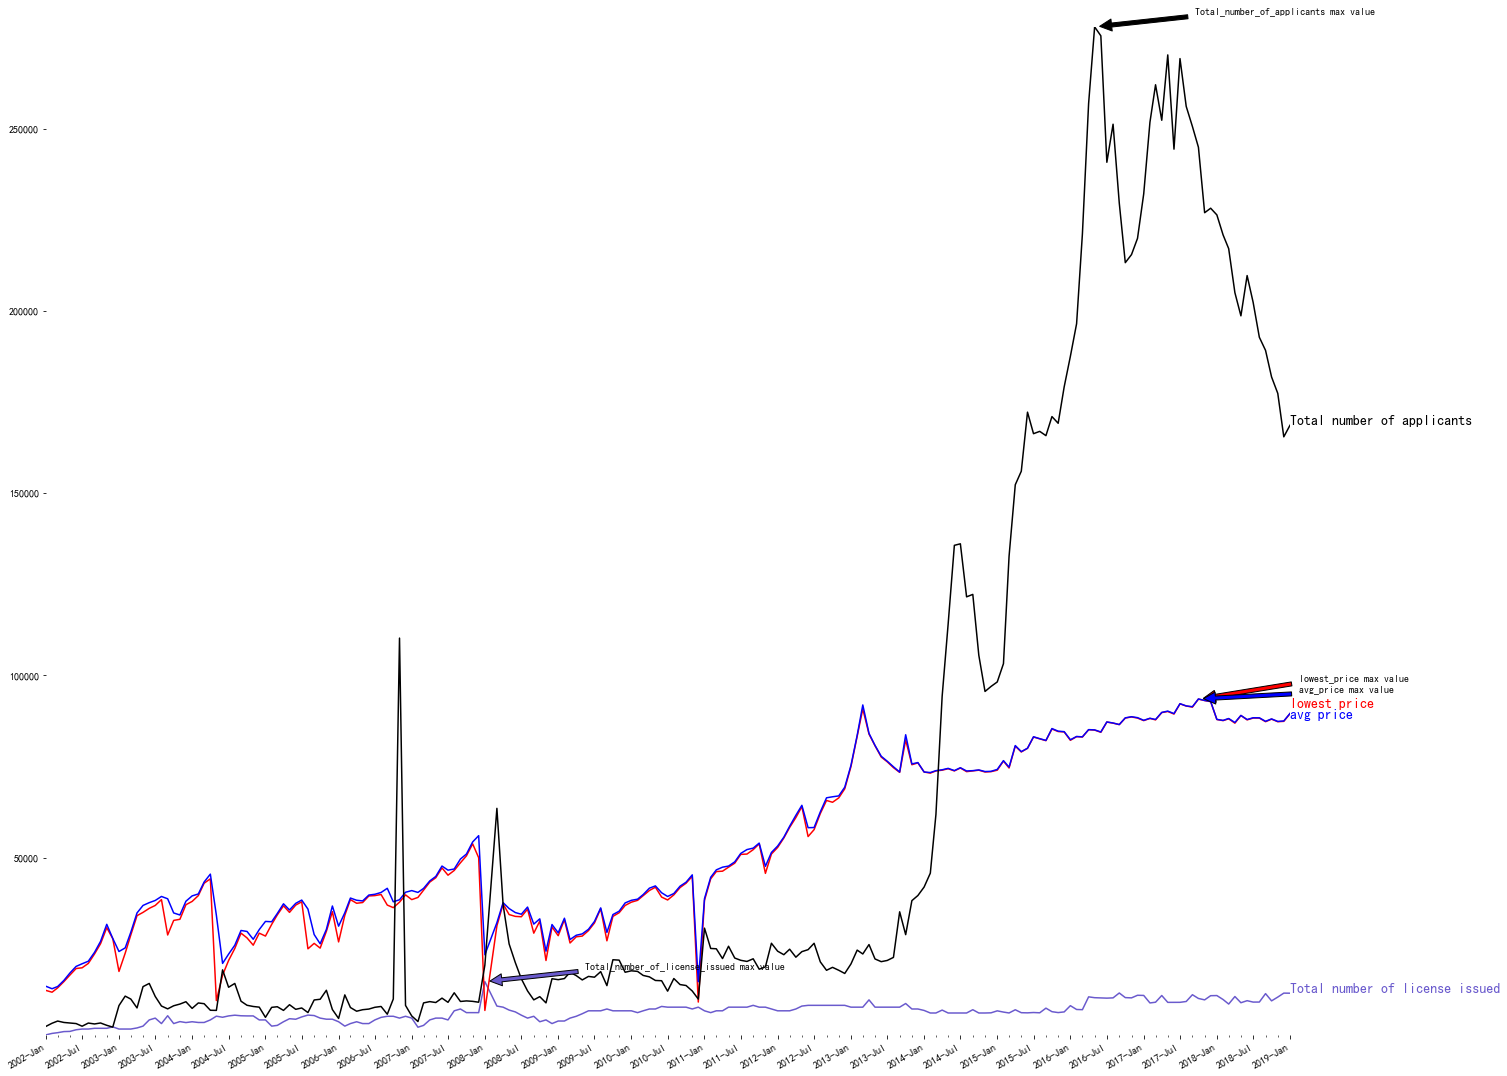

In [146]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(24, 20))

# 删除绘图框线。
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# 确保轴刻度只显示在绘图的底部和左侧。
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# 根据日期和数值范围设置X、Y显示范围
ax.set_xlim(x[0], x[-1])
ax.set_ylim(y_min, y_max)  

# 不同数据对应的颜色编码
ax.set_prop_cycle(color=['slateblue', 'red', 'blue', 'black'])

# 用于调整数据标签在的Y坐标，因为部分数据最后一个值可能比较接近
y_offsets = {'Total number of license issued': 0, 'lowest price': 1500,
             'avg price': -1500,
             'Total number of applicants': 0}

for column in field:
    # 把每一条线分别用它自己的颜色画出来。
    column_rec_name = column.replace('\n', '_').replace(' ', '_')
    line, = ax.plot(x, column_rec_name, data= license_data,  lw=1.5)
   
    # 在每行的右端添加一个文本标签。
    y_pos = license_data[column_rec_name][-1]
    y_max = numpy.amax(license_data[column_rec_name])
    d = numpy.where(license_data[column_rec_name] == y_max)
       
    # 添加特定的偏移量，因为一些标签重叠了。
    y_pos += y_offsets[column]

    ax.text(x[-1], y_pos, column, fontsize=14, color=line.get_color())
    for idx in numpy.nditer(d):        
        ax.annotate('{label} max value'.format(label=column_rec_name), 
                     xy = (x[idx], y_max), 
                     xytext = (x[idx]+500, y_max+3500+y_offsets[column]),
                     arrowprops = dict(facecolor = line.get_color(),
                                       shrink = 0.05))
# X轴刻度以年月的形式显示
monthsLoc = mpl.dates.MonthLocator(interval=6)
monthsLoc1 = mpl.dates.MonthLocator(interval=2)
ax.xaxis.set_major_locator(monthsLoc)
ax.xaxis.set_minor_locator(monthsLoc1)
monthsFmt = mpl.dates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(monthsFmt)
fig.autofmt_xdate(bottom=0.18)
fig.subplots_adjust(left=0.18)
#plt.savefig('Shanghai_car_licence.png')
plt.show()

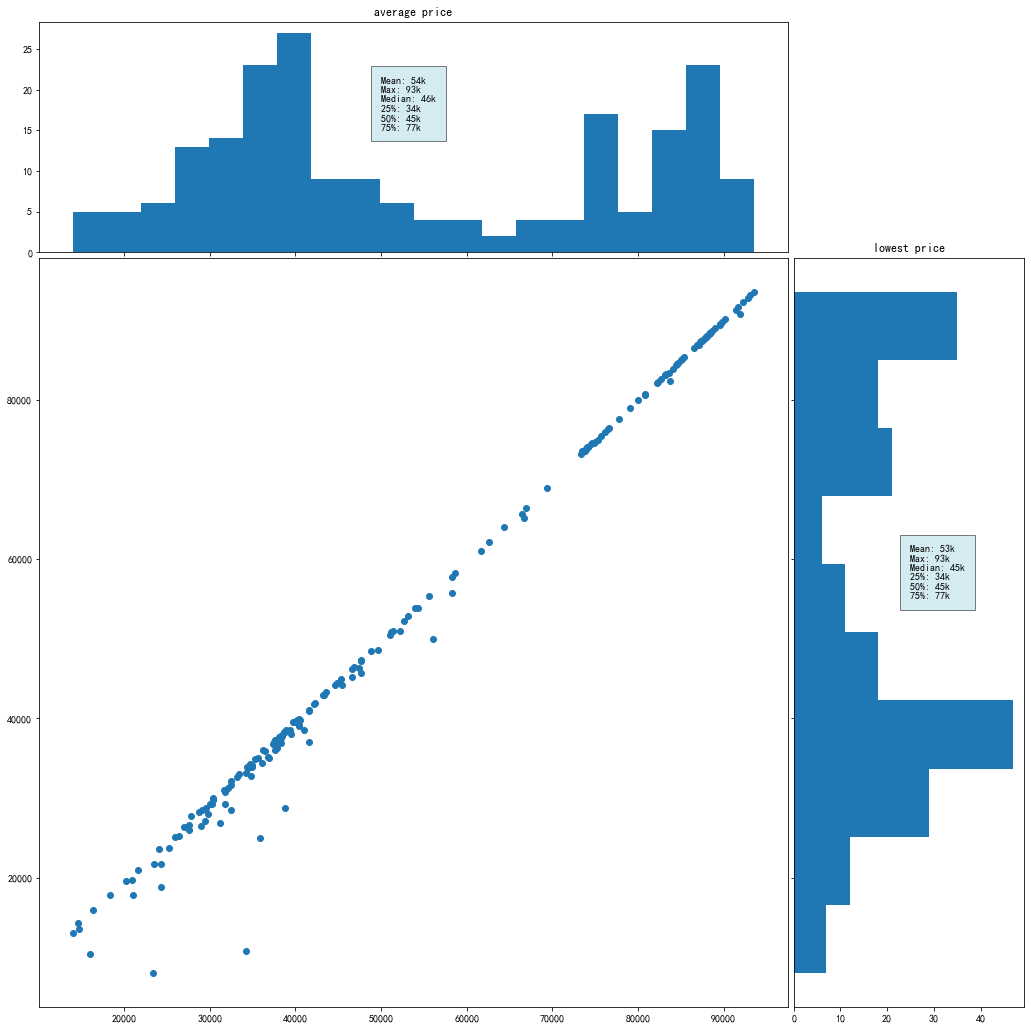

In [147]:
count = license_data.size
avg_mean = int(numpy.mean(license_data['avg_price'])/1000)
avg_median = int(numpy.median(license_data['avg_price'])/1000)
avg_min = int(numpy.min(license_data['avg_price'])/1000)
avg_max = int(numpy.max(license_data['avg_price'])/1000)
avg_25p, avg_50p, avg_75p = (numpy.percentile(
    license_data['lowest_price'], [25, 50, 75])/1000).astype(int)

lowest_mean = int(numpy.mean(license_data['lowest_price'])/1000)
lowest_median = int(numpy.median(license_data['lowest_price'])/1000)
lowest_min = int(numpy.min(license_data['lowest_price'])/1000)
lowest_max = int(numpy.max(license_data['lowest_price'])/1000)
lowest_25p, lowest_50p, lowest_75p = (numpy.percentile(
    license_data['lowest_price'], [25, 50, 75])/1000).astype(int)

# 定义坐标系大小
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# 创建正方形绘图
fig = plt.figure(figsize=(16, 16))

# 在绘图上划分坐标系
ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# 坐标系相邻的区域不显示刻度
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)

# 绘图
ax.scatter(license_data['avg_price'], license_data['lowest_price'])
ax_histx.hist(license_data['avg_price'], bins=20)
ax_histx.set_title('average price')
ax_histx.text(50000, 15, 'Mean: {}k \nMax: {}k\nMedian: {}k\n25%: {}k\n50%: {}k\n75%: {}k'.format(avg_mean, avg_max, avg_median, avg_25p, avg_50p, avg_75p), style='italic',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})
ax_histy.hist(license_data['lowest_price'],orientation='horizontal')
ax_histy.set_title('lowest price')
ax_histy.text(25, 55000, 'Mean: {}k \nMax: {}k\nMedian: {}k\n25%: {}k\n50%: {}k\n75%: {}k'.format(lowest_mean, lowest_max, lowest_median,
                                                                                                  lowest_25p, lowest_50p, lowest_75p), style='italic',
        bbox={'facecolor': 'lightblue', 'alpha': 0.5, 'pad': 10})

plt.show()

In [179]:
data = numpy.genfromtxt('weatherdata-3111216.csv',
                         delimiter=',', skip_header=1)

In [180]:
data

array([[         nan, 121.56199646,  31.06679916, ...,   0.7752598 ,
          4.87125324,          nan],
       [         nan, 121.56199646,  31.06679916, ...,   0.80982999,
          3.13875072,          nan],
       [         nan, 121.56199646,  31.06679916, ...,   0.85897935,
          7.0988013 ,          nan],
       ...,
       [         nan, 121.56199646,  31.06679916, ...,   0.81235931,
         28.19720235,          nan],
       [         nan, 121.56199646,  31.06679916, ...,   0.79428873,
         28.56608974,          nan],
       [         nan, 121.56199646,  31.06679916, ...,   0.83383561,
         28.12646966,          nan]])

In [181]:
with open('weatherdata-3111216.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)

    column = []
    date = []                    # 记录数据中的年月
    year = {}                    # 记录数据中的年
    for row in reader:
        column.append(row['Date'])
        dtime = time.strptime(row['Date'], "%m/%d/%Y")
        date.append((dtime.tm_year, dtime.tm_mon))
        year[dtime.tm_year] = year.get(dtime.tm_year, 0) + 1
date

[(1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 1),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 2),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (1979, 3),
 (19

In [187]:
# 将年份提取出来
years = list(year.keys())

# 将每月的天数提取出来
h = collections.Counter(date)
days = list(h.values())
days

[31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 29,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 1,
 31,
 30,
 31,
 31,
 29,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 30,
 30,
 31,
 31,
 30,
 31,
 30,
 24,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 29,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 29,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 30,
 31,
 30,
 31,
 31,
 28,
 31,
 30,
 31,
 30,
 31,
 31,
 

In [188]:
precipitation = data[:, -4]      # 日降雨量
rainfall = numpy.empty((36, 12)) # 月平均降雨量数组


In [189]:
# 计算每月平均
start = 0
stop = 0
it = numpy.nditer(rainfall, op_flags=['readwrite'])

with it:
    i = 0
    start = 0
    stop = 0
    for x in it:
        if (i < len(days)):
            stop += days [i]
            avr = numpy.sum(precipitation[start:stop])
            x[...] = avr
            start = stop
            i += 1
        else:
            x[...] = 0
rainfall


array([[150.17784416, 130.95026042, 137.98459688, 144.68773557,
        111.14006272, 127.03923259, 102.59326426, 159.81059239,
        121.45687185, 127.77752852, 146.38392897, 141.26892209],
       [162.47313309, 148.58510004, 150.99051617, 146.91974701,
        133.00137894, 109.24634951, 108.35119294, 100.41110034,
        115.59103058, 130.335291  , 122.7014955 , 147.30595461],
       [172.47082412, 127.70762607, 144.20262463, 120.15585874,
        121.28209803, 129.14957982, 129.15568161, 112.20152871,
        132.04624302, 134.78944309, 168.67525415, 156.96707794],
       [149.1413918 , 127.89717226, 145.04990061, 130.20627146,
        129.89391373, 110.09431446, 122.32301227, 139.74351172,
         98.83263017, 112.64387246, 156.41509565, 154.98573966],
       [141.3456182 , 136.09452558, 139.18375449, 139.38877126,
        135.21176421, 116.10283782, 122.47984702, 110.93124903,
          2.3520018 , 124.32611479, 123.12706786, 144.78509877],
       [164.39231827, 136.83068969,

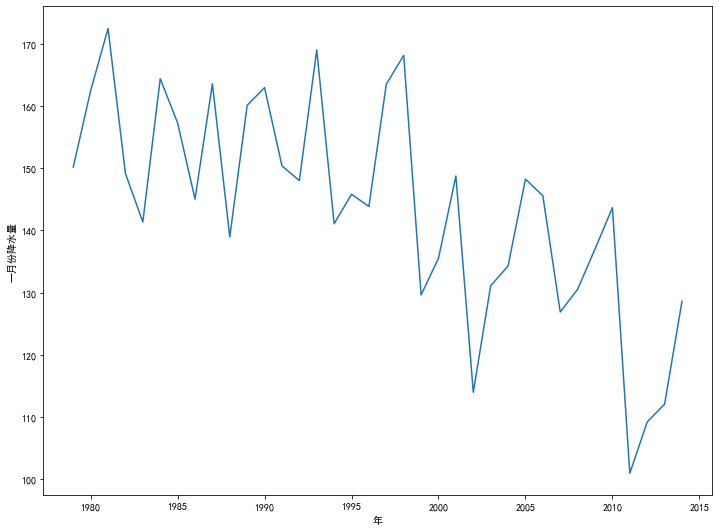

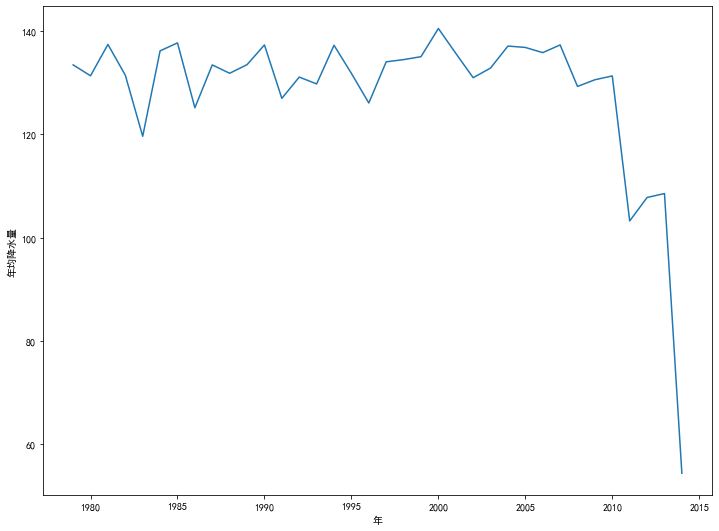

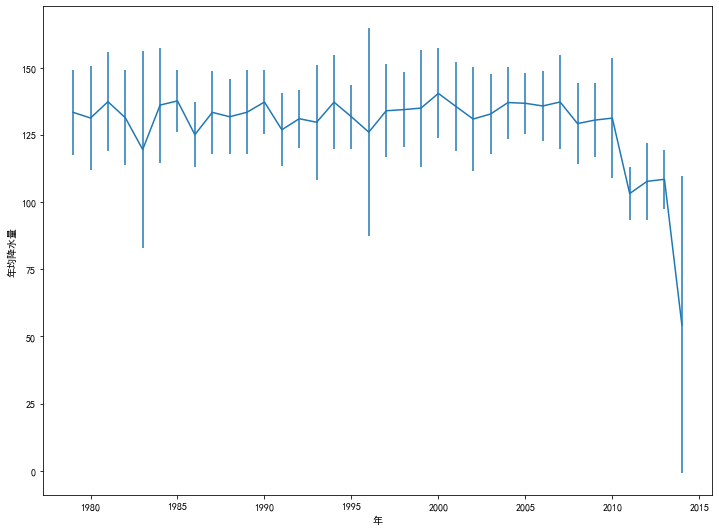

In [190]:
# 将年份提取出来
years = list(year.keys())
plt.rcParams['font.sans-serif'] = ['SimHei']
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.plot(years, rainfall[:,0])
ax.set_xlabel('年')
ax.set_ylabel('一月份降水量')
plt.show()

mean_rainfall_in_month = rainfall.mean(axis=0)
mean_rainfall_per_year = rainfall.mean(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.plot(years, mean_rainfall_per_year)
ax.set_xlabel('年')
ax.set_ylabel('年均降水量')
plt.show()

std_rainfall_per_year = rainfall.std(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.errorbar(years, mean_rainfall_per_year, yerr = std_rainfall_per_year)
ax.set_xlabel('年')
ax.set_ylabel('年均降水量')
plt.show()



In [191]:
mean_rainfall_in_month = rainfall.mean(axis=0)
mean_rainfall_per_year = rainfall.mean(axis=1)


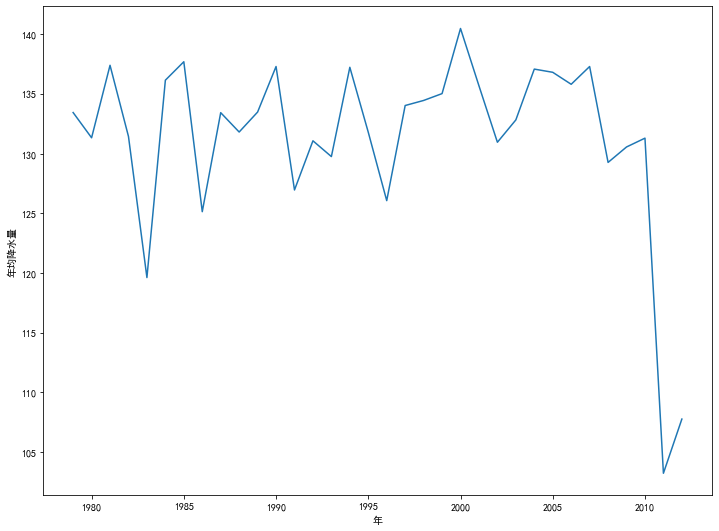

In [192]:
mean_rainfall_in_month = rainfall.mean(axis=0)
mean_rainfall_per_year = rainfall.mean(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.plot(years[0:-2:], mean_rainfall_per_year[0:-2])
ax.set_xlabel('年')
ax.set_ylabel('年均降水量')
plt.show()


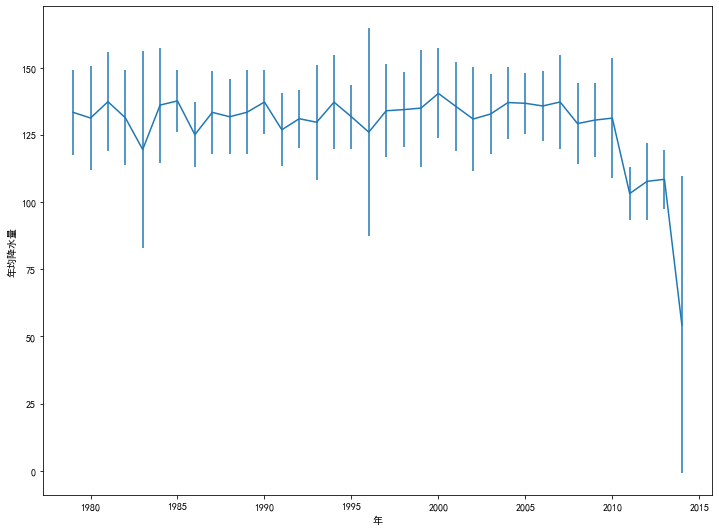

In [193]:
std_rainfall_per_year = rainfall.std(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.errorbar(years, mean_rainfall_per_year, yerr = std_rainfall_per_year)
ax.set_xlabel('年')
ax.set_ylabel('年均降水量')
plt.show()


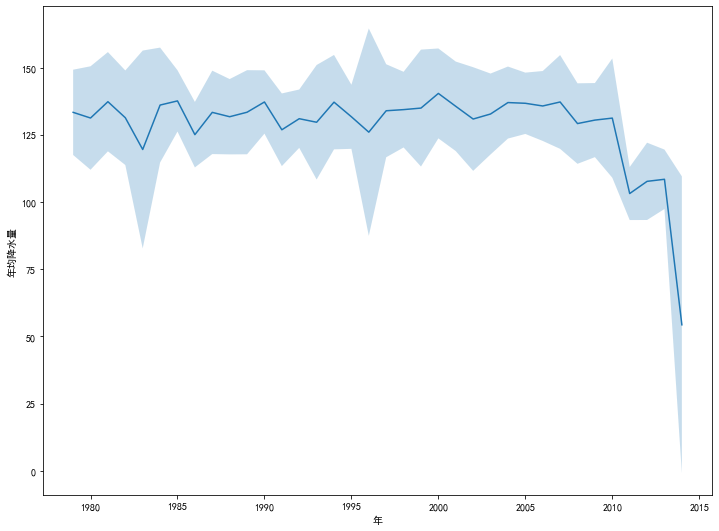

In [194]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.plot(years, mean_rainfall_per_year)
ax.fill_between(years, mean_rainfall_per_year -
                std_rainfall_per_year,
                mean_rainfall_per_year + 
                std_rainfall_per_year, alpha=0.25, color=None)
ax.set_xlabel('年')
ax.set_ylabel('年均降水量')
plt.show()


Text(0, 0.5, '月降水量')

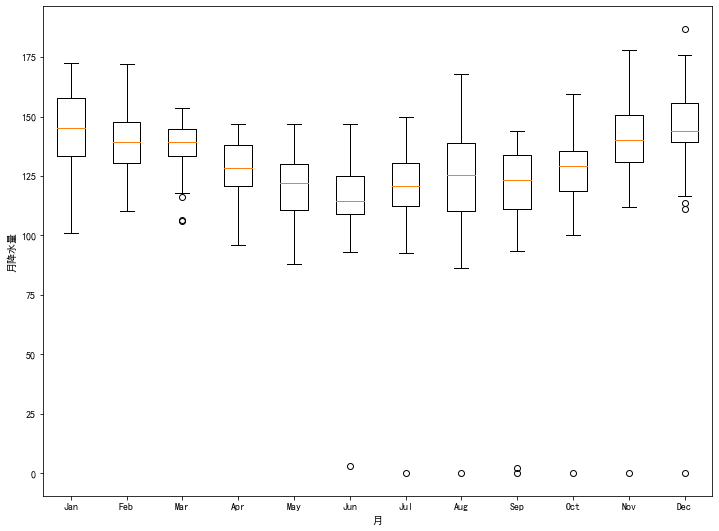

In [195]:
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.boxplot(rainfall, labels=months)
ax.set_xlabel('月')
ax.set_ylabel('月降水量')


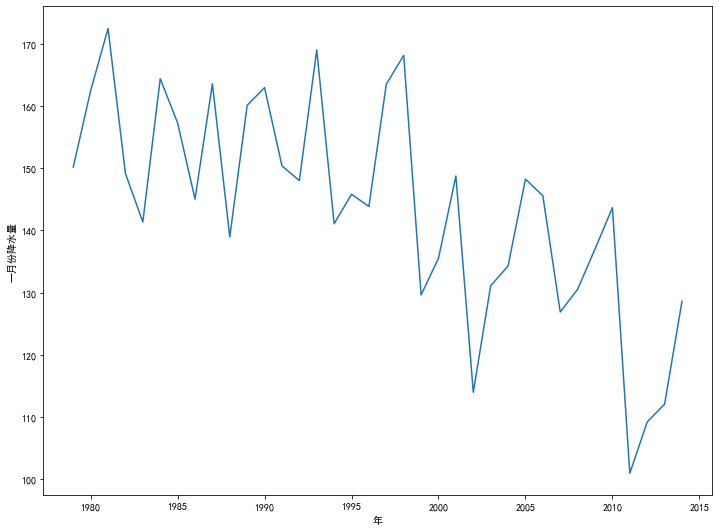

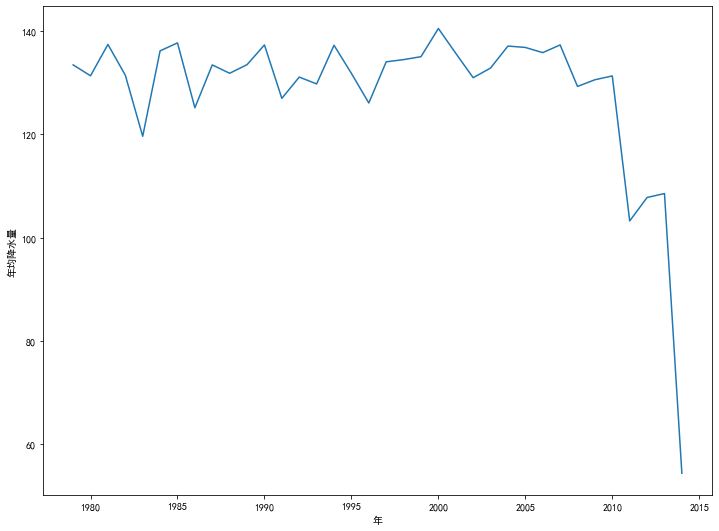

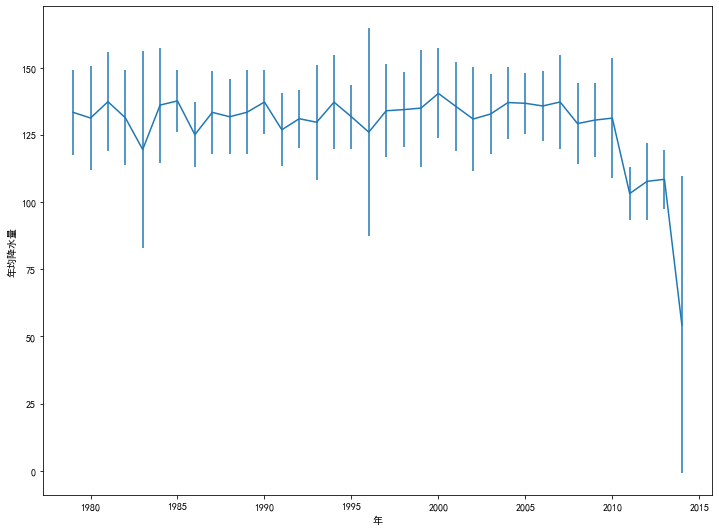

Text(0, 0.5, '月降水量')

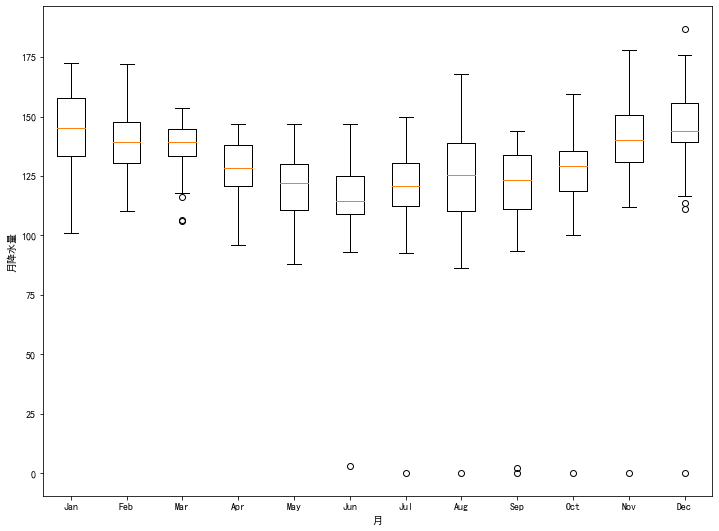

In [196]:
import numpy
import csv
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import collections

data = numpy.genfromtxt('weatherdata-3111216.csv',
                         delimiter=',', skip_header=1)

with open('weatherdata-3111216.csv','r') as csvfile:
    reader = csv.DictReader(csvfile)

    column = []
    date = []                    # 记录数据中的年月
    year = {}                    # 记录数据中的年
    for row in reader:
        column.append(row['Date'])
        dtime = time.strptime(row['Date'], "%m/%d/%Y")
        date.append((dtime.tm_year, dtime.tm_mon))
        year[dtime.tm_year] = year.get(dtime.tm_year, 0) + 1

# 将年份提取出来
years = list(year.keys())

# 将每月的天数提取出来
h = collections.Counter(date)
days = list(h.values())

precipitation = data[:, -4]       # 日降雨量
rainfall =  numpy.empty((36, 12)) # 月平均降雨量数组

# 计算每月平均
start = 0
stop = 0
it = numpy.nditer(rainfall, op_flags=['readwrite'])

with it:
    i = 0
    start = 0
    stop = 0
    for x in it:
        if (i < len(days)):
            stop += days [i]
            avr = numpy.sum(precipitation[start:stop])
            x[...] = avr
            start = stop
            i += 1
        else:
            x[...] = 0

plt.rcParams['font.sans-serif'] = ['SimHei']
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.plot(years, rainfall[:,0])
ax.set_xlabel('年')
ax.set_ylabel('一月份降水量')
plt.show()

mean_rainfall_in_month = rainfall.mean(axis=0)
mean_rainfall_per_year = rainfall.mean(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.plot(years, mean_rainfall_per_year)
ax.set_xlabel('年')
ax.set_ylabel('年均降水量')
plt.show()

std_rainfall_per_year = rainfall.std(axis=1)
fig, ax = plt.subplots(1, 1, figsize=(12, 9))
ax.errorbar(years, mean_rainfall_per_year, yerr = std_rainfall_per_year)
ax.set_xlabel('年')
ax.set_ylabel('年均降水量')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(12, 9))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.boxplot(rainfall, labels=months)
ax.set_xlabel('月')
ax.set_ylabel('月降水量')

## 练习

In [198]:
# 1
data = numpy.genfromtxt('anscombe_quartet.csv',
                         delimiter=',', skip_header=1)
data

array([[10.  ,  8.04, 10.  ,  9.14, 10.  ,  7.46,  8.  ,  6.58],
       [ 8.  ,  6.95,  8.  ,  8.14,  8.  ,  6.77,  8.  ,  5.76],
       [13.  ,  7.58, 13.  ,  8.74, 13.  , 12.74,  8.  ,  7.71],
       [ 9.  ,  8.81,  9.  ,  8.77,  9.  ,  7.11,  8.  ,  8.84],
       [11.  ,  8.33, 11.  ,  9.26, 11.  ,  7.81,  8.  ,  8.47],
       [14.  ,  9.96, 14.  ,  8.1 , 14.  ,  8.84,  8.  ,  7.04],
       [ 6.  ,  7.24,  6.  ,  6.13,  6.  ,  6.08,  8.  ,  5.25],
       [ 4.  ,  4.26,  4.  ,  3.1 ,  4.  ,  5.39, 19.  , 12.5 ],
       [12.  , 10.84, 12.  ,  9.13, 12.  ,  8.15,  8.  ,  5.56],
       [ 7.  ,  4.82,  7.  ,  7.26,  7.  ,  6.42,  8.  ,  7.91],
       [ 5.  ,  5.68,  5.  ,  4.74,  5.  ,  5.73,  8.  ,  6.89]])

In [207]:
# 2

for i in range(8):
    print("平均值： %.2f， 标准差： %.2f\n" % (data[:,i].mean(), data[:,i].std(ddof=1)))


平均值： 9.00， 标准差： 3.32

平均值： 7.50， 标准差： 2.03

平均值： 9.00， 标准差： 3.32

平均值： 7.50， 标准差： 2.03

平均值： 9.00， 标准差： 3.32

平均值： 7.50， 标准差： 2.03

平均值： 9.00， 标准差： 3.32

平均值： 7.50， 标准差： 2.03



In [219]:
# 3

# 第一组数据的线性回归
x1 = data[:,0]
y1 = data[:,1]
A1 =  numpy.vstack([x1, numpy.ones(len(x1))]).T
a1, b1 = numpy.linalg.lstsq(A1,y1,rcond=None)[0]
print("第一组数据的线性回归斜率为%.2g, 相关系数为%g"%(a1, numpy.corrcoef(x1, y1)[0][0]))

# 第2组数据的线性回归
x2 = data[:,2]
y2 = data[:,3]
A2 =  numpy.vstack([x2, numpy.ones(len(x2))]).T
a2, b2 = numpy.linalg.lstsq(A2,y2,rcond=None)[0]
print("第二组数据的线性回归斜率为%.2g, 相关系数为%g"%(a2, numpy.corrcoef(x2, y2)[0][0]))


# 第3组数据的线性回归
x3 = data[:,4]
y3 = data[:,5]
A3 =  numpy.vstack([x3, numpy.ones(len(x3))]).T
a3, b3 = numpy.linalg.lstsq(A3,y3,rcond=None)[0]
print("第三组数据的线性回归斜率为%.2g, 相关系数为%g"%(a3, numpy.corrcoef(x3, y3)[0][0]))

# 第4组数据的线性回归
x4 = data[:,6]
y4 = data[:,7]
A4 =  numpy.vstack([x4, numpy.ones(len(x4))]).T
a4, b4 = numpy.linalg.lstsq(A4,y4,rcond=None)[0]
print("第四组数据的线性回归斜率为%.2g, 相关系数为%g"%(a4, numpy.corrcoef(x4, y4)[0][0]))


第一组数据的线性回归斜率为0.5, 相关系数为1
第二组数据的线性回归斜率为0.5, 相关系数为1
第三组数据的线性回归斜率为0.5, 相关系数为1
第四组数据的线性回归斜率为0.5, 相关系数为1


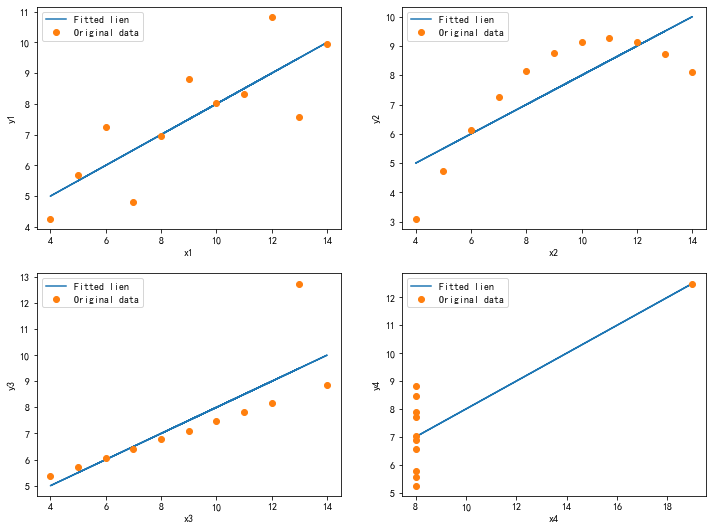

In [229]:
# 4
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
ax[0][0].plot(x1, a1*x1+b1, label='Fitted lien')
ax[0][0].plot(x1, y1, 'o', label='Original data')
ax[0][0].set_xlabel("x1")
ax[0][0].set_ylabel("y1")
ax[0][0].legend()

ax[0][1].plot(x2, a2*x2+b2, label='Fitted lien')
ax[0][1].plot(x2, y2, 'o', label='Original data')
ax[0][1].set_xlabel("x2")
ax[0][1].set_ylabel("y2")
ax[0][1].legend()

ax[1][0].plot(x3, a3*x3+b3, label='Fitted lien')
ax[1][0].plot(x3, y3, 'o', label='Original data')
ax[1][0].set_xlabel("x3")
ax[1][0].set_ylabel("y3")
ax[1][0].legend()

ax[1][1].plot(x4, a4*x4+b4, label='Fitted lien')
ax[1][1].plot(x4, y4, 'o', label='Original data')
ax[1][1].set_xlabel("x4")
ax[1][1].set_ylabel("y4")
ax[1][1].legend()
plt.show()


